<a href="https://colab.research.google.com/github/Toshiki18/OCR/blob/main/Japanese_handwritten_text_detection_rotation_correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**【日本語の文字検出 & 角度補正のためのプログラム】**<br><br>
<b>【ステップ３-４：傾いた画像の日本語検出】</b>
<br>
傾き・角度補正の機能を実装：横書き・縦書き文章の日本語手書き文字検出（ブロック→行と列→個別文字）
<br><br>
このプログラムでの処理の流れ
<br>
直線の検出と除去→ブロック検出＋ノイズ除去→角度補正→行と列検出→個別文字検出
<br><br>
<b>【使い方の解説動画】</b><br>
[【日本語 - 手書き編 #3-4】傾き・角度補正：横書き・縦書き - Japanese handwritten character OCR:Text Detection & rotation correction by RehabC - デジタルで、遊ぶ。（YouTube）](https://youtu.be/g7xgzFcFpBQ)
<br>
<br>



**The MIT License**

Copyright 2021 child programmer

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
<br><br>

<b>① Googleアカウントでログインした状態で、「ファイル - ドライブにメニューを保存」し、以下の手順を進めます。</b>


<b>② 角度補正させたい画像をアップロードします。</b><br>
今回のプログラムで使用する画像：<br>
・**文字列が傾いている画像（横書き・縦書き）**<br>
・**線あり（縦線・横線）**<br>
・**汚れ/ノイズあり**<br>
<br>
＊「③ 角度補正プログラムの実行」では、線なし・汚れ/ノイズなしの文字列が傾いた画像「H4_tegaki.png」（横書き）・「V4_tegaki.png」（縦書き）を利用。<br>
＊「④ これまでに作成してきた文字検出プログラムに、角度補正の機能を組み込んだプログラム」では、線あり・汚れ/ノイズありの文字列が傾いた画像「H5_tegaki.png」（横書き）・「V5_tegaki.png」（縦書き）を利用。
<br>
<br>
文字検出用のサンプル画像（ステップ3-1と同じ圧縮ファイルです）<br>
[ダウンロード：日本語手書き文字検出・OCR用サンプル画像 by 子供プログラマー](https://child-programmer.com/download/japanese-handwritten-text-detection-horizontal-vertical-images/)
<br><br>

<b>③ 角度補正プログラムの実行。</b><br>
以下の画像<br>
・「H4_tegaki.png」（横書きの日本語文字画像：直線なし＋ノイズなし＋傾きあり）<br>
・「V4_tegaki.png」（縦書きの日本語文字画像：直線なし＋ノイズなし＋傾きあり）<br>
の傾きの角度補正を実行します。<br>
プログラムを実行前に「H4_tegaki.png」「V4_tegaki.png」をアップロードしておきます。<br>
デフォルト（初期設定）では<br>
・「H4_tegaki.png」（横書きの日本語文字画像：直線なし＋ノイズなし＋傾きあり）の画像<br>
の角度補正をする設定にしてあります。<br><br>
このプログラムは、ノイズや直線などがない、文字だけの画像を利用してください。<br>
詳細の仕組みは、公開時点では理解に及びませんでしたが、とりあえず、角度補正は上手くいくようでした…<br>
可能な範囲ですが、コード解説を入れておきました..

【元の画像】


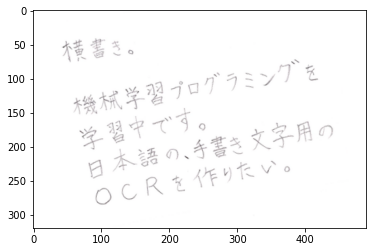

【2値化画像】


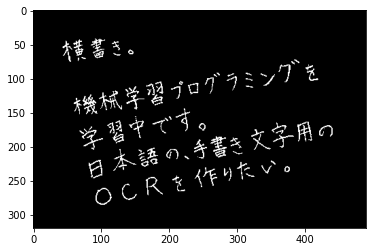

【輪郭を描画した画像】
　ブロブの数: 79


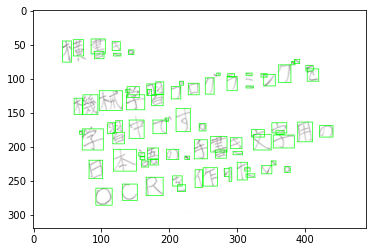

【角度補正した画像】
　補正角度： -9.700393676757812 度


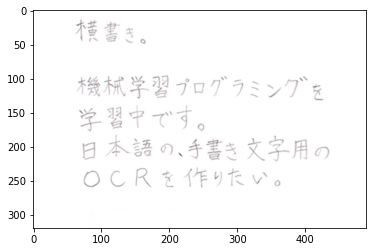

In [ ]:
# 各種インポート
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 角度補正する画像
input_file = 'H4_tegaki.png' # ここを変更
                             # 角度補正したい画像のファイル名を入力します

# ブロブ処理（粒子解析・ラベリング）
# 画像内のブロブを検出するために、グレースケールと適応しきい値に変換してバイナリ画像を取得します
# ブロブ（塊・連結領域）とは、似た特徴を持った画像内の領域を意味
# ブロブ検出は類似した色の連結領域（ブロブ）を識別するために画像を分析
# ブロブ解析（中心座標やサイズなど取得）
# 画像をラベリング処理し、ラベル付けされた領域の特徴を解析することをブロブ解析

# 画像の読み込み
img = cv2.imread(input_file)

print('【元の画像】')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# モノクロ・グレースケール画像へ変換（2値化前の画像処理）
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2値化（Binarization）：白（1）黒（0）のシンプルな2値画像に変換
retval, img_binary = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

print('【2値化画像】')
plt.imshow(cv2.cvtColor(img_binary, cv2.COLOR_BGR2RGB))
plt.show()

# 輪郭を見つける
cnts, hierarchy = cv2.findContours(img_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
      
# 輪郭の選択
# 面積が小さい輪郭削除 「5」のところの数値より小さい輪郭は削除
cnts = list(filter(lambda cnts: 5 < cv2.contourArea(cnts), cnts))


# 入力画像のMat（画像用の行列）のコピー
blob_cnts = np.copy(img)

# 輪郭を描画した配列を作成
cv2.drawContours(blob_cnts, cnts, -1, (255,0,0))

# 外接矩形
# 入力画像のMat（画像用の行列）のコピー
bounding_img = np.copy(img)

# 画面に矩形の輪郭を描画 
for contour in cnts:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(bounding_img, (x, y), (x + w, y + h), (0, 255, 0), 1)

print('【輪郭を描画した画像】')
# 輪郭の個数を出力
print('　ブロブの数: %d' % len(cnts))
plt.imshow(cv2.cvtColor(bounding_img, cv2.COLOR_BGR2RGB))
plt.show()

# ブロブの角度からcv2.minAreaRect()で、スキュー角度（傾斜：skew angle）を計算
# スキュー角度：水平および垂直の配置に画像イメージを返すのに必要な回転の量
# np.where(block_img_binary > 0)：0より大きい全てのピクセル値の座標を取得
# np.column_stack：配列を列方向に積み重ねる
coordinates= np.column_stack(np.where(img_binary > 0))

# 全ての座標の最小回転境界ボックスを計算
# 長方形が、xy軸と平行な状態の時に「-90」を返す。時計回りに回転させていくと「0」にむかって値が増えていく
# 長方形は、90度回転すると、xy軸と平行な状態になるため、「-90」に戻る
angle = cv2.minAreaRect(coordinates)[-1]
if angle < -45:
    angle = -(90 + angle)
else:
    angle = -angle

# アフィン変換を適用してスキュー角度（傾斜：skew angle）を修正
# 水平になるように回転
(h, w) = img.shape[:2]
center = (w // 2, h // 2)
# 回転のための変換行列の生成 
# cv2.getRotationMatrix2D（入力画像の回転中心, 回転角度 単位は度 - 正の値：反時計回り, 等方性スケーリング係数 - 拡大縮小の倍率）
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

# v2.warpAffine（元の画像, cv2.getRotationMatrix2Dで生成した2*3の変換行列, 出力する画像サイズ(縦の高さ, 横の幅)）
rotate_img = cv2.warpAffine(img, rotation_matrix, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

#  元の画像を傾き角度補正（回転）した画像を表示
print('【角度補正した画像】')
print('　補正角度：', angle, '度')
plt.imshow(cv2.cvtColor(rotate_img, cv2.COLOR_BGR2RGB))
plt.savefig('rotation_correction.png', dpi=60)  # 角度補正後の画像ファイルの保存用。「dpi」は何も指定しないと dpi=72
plt.show()










<br><br>
<b>④ これまでに作成してきた文字検出プログラムに、角度補正の機能を組み込んだプログラム。</b>
<br>
以下の画像<br>
・「H5_tegaki.png」（横書きの日本語文字画像：直線＋ノイズ＋傾きあり）<br>
・「V5_tegaki.png」（縦書きの日本語文字画像：直線＋ノイズ＋傾きあり）<br>
の文字検出を実行します。プログラムを実行前に「H5_tegaki.png」「V5_tegaki.png」をアップロードしておきます。<br>
デフォルト（初期設定）では<br>
・「H5_tegaki.png」（横書きの日本語文字画像：直線＋ノイズ＋傾きあり）の画像<br>
を検出する設定にしてあります。
<br><br>

**【補足コメント】**
<br>
このプログラムは、ノイズ除去の機能などが実装されています。<br>

ノイズ除去処理をすることで、画像がぼやけてOCR時などの精度が低下することも考えられます。<br>
実際に自前画像で試す際には、「大まかな文字領域の検出（ブロック検出）＋ ノイズ除去」内の記述<br>
img = cv2.medianBlur(img, 3)<br>
をなくして事前に画像処理ソフトなどでノイズを除去した方がいいのかもしれません。
<br>今回のコードは、プログラムとしてノイズ除去を実装する機能を備えた方法の一例として捉えていただけますと幸いです。
<br>

【直線を検出中・・・】直線検出する画像


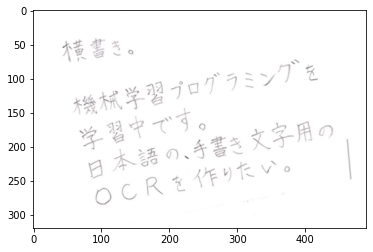

【直線を検出中・・・】2値化処理画像 - Binarization


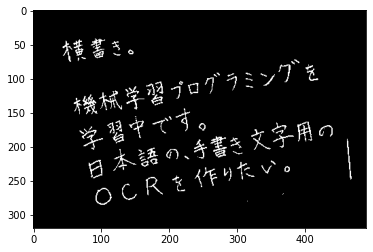


【直線の検出結果】
　直線が検出されました。検出した直線を削除します。

【直線検出部位の視覚化】
　赤色部分が検出できた直線。


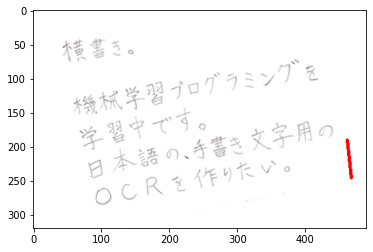


【直線検出部位の削除結果：元の画像から削除】
　白色部分が検出した直線を消した場所（背景が白の場合は区別できません）。


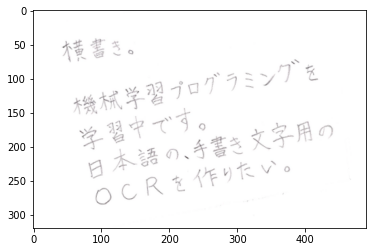


【直線検出部位の削除結果：2値化処理画像 - Binarization】
　直線を除去した結果。


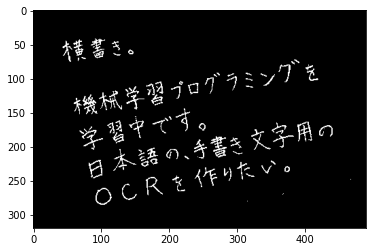


【2値化処理画像 - Binarization】
  画像の2値化と白部分の膨張を工夫することで、大まかな文字領域の検出（ブロック検出）をしています。
  この段階で、文字が「白」として処理できていないと輪郭の検出がしにくいようでした。


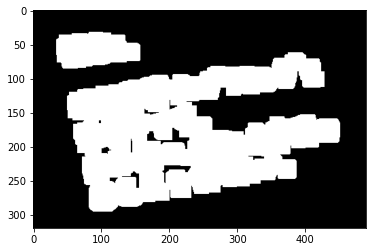


【横書きの文字領域の輪郭検出・抽出結果 - Text detection・Contours】
  枠が大きすぎる場合・小さすぎる場合には輪郭を除去しています。画像によって微調整する必要があります。


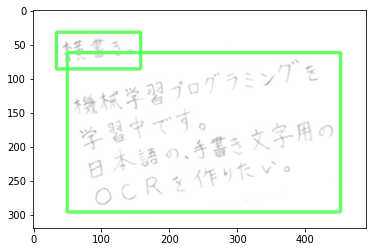

['block_ROI_img0.png', 'block_ROI_img1.png']
【元の画像】


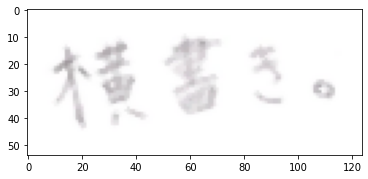

【2値化画像】


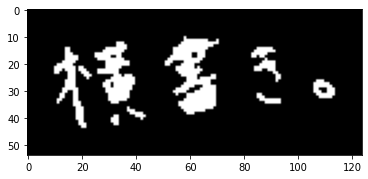

【輪郭を描画した画像】
　ブロブの数: 8


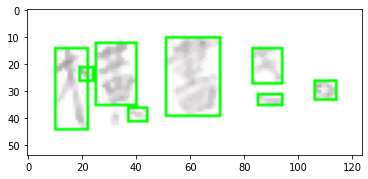

【角度補正した画像】
　補正角度： -6.009010314941406 度


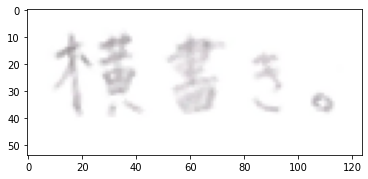

【元の画像】


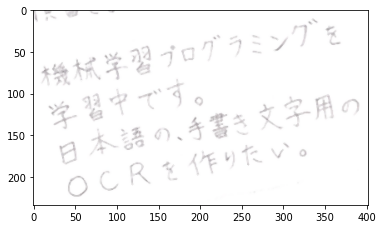

【2値化画像】


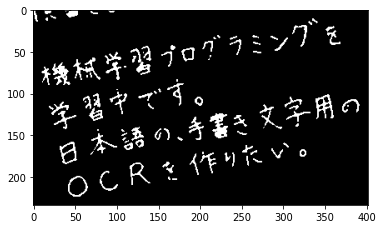

【輪郭を描画した画像】
　ブロブの数: 77


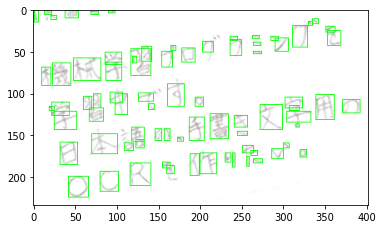

【角度補正した画像】
　補正角度： -9.78240966796875 度


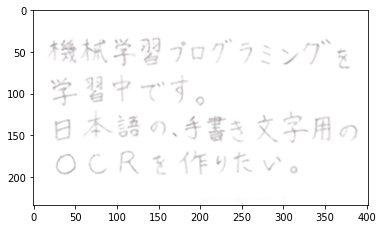

['rotate_block_ROI_img0.png', 'rotate_block_ROI_img1.png']

【各行の2値化処理画像 - Binarization】

【各行の2値化処理画像 - Binarization】
['row_column_ROI_img0.png', 'row_column_ROI_img1.png', 'row_column_ROI_img2.png', 'row_column_ROI_img3.png', 'row_column_ROI_img4.png']
['rotate_block_ROI_img0.png', 'rotate_block_ROI_img1.png']

【各行の2値化処理画像 - Binarization】
  画像の2値化と白部分の膨張を工夫することで、文字と文字の繋がりを検出しています。
  画像のテキストの文字の「太さ」「行間」「文字間隔」によっては、画像のリサイズの微調整や膨張処理の微調整が必要です。


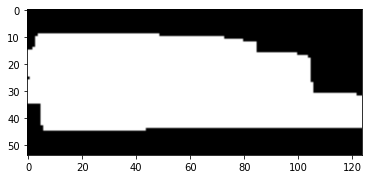


【各行の文字の輪郭検出・抽出結果 - Text recognition・Contours】
  枠が大きすぎる場合・小さすぎる場合には輪郭を除去しています。画像によって微調整する必要があります。


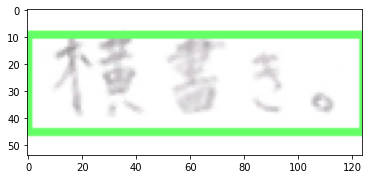


【各行の2値化処理画像 - Binarization】
  画像の2値化と白部分の膨張を工夫することで、文字と文字の繋がりを検出しています。
  画像のテキストの文字の「太さ」「行間」「文字間隔」によっては、画像のリサイズの微調整や膨張処理の微調整が必要です。


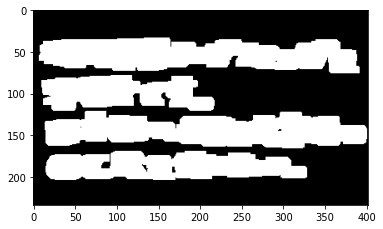


【各行の文字の輪郭検出・抽出結果 - Text recognition・Contours】
  枠が大きすぎる場合・小さすぎる場合には輪郭を除去しています。画像によって微調整する必要があります。


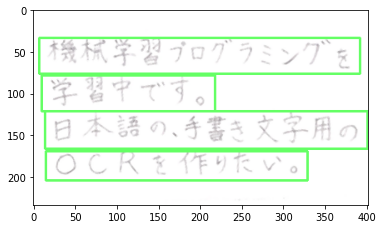

['row_column_ROI_img0.png', 'row_column_ROI_img1.png', 'row_column_ROI_img2.png', 'row_column_ROI_img3.png', 'row_column_ROI_img4.png']

【白部分の膨張処理 - Dilation】各行の2値化処理画像 - Binarization
  画像の2値化と白部分の膨張を工夫することで、個別の文字を検出しやすいようにしています。
  画像のテキストの文字の「太さ」「行間」「文字間隔」によっては、画像のリサイズや膨張処理の微調整が必要です。
  この段階で、文字が他の文字と繋がってしまうと、個別の文字の検出ができなくなります。


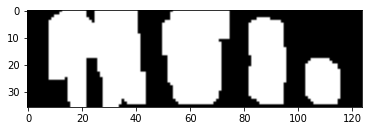


【各行の文字の輪郭検出・抽出結果 - Text recognition・Contours】
  枠が大きすぎる場合・小さすぎる場合には輪郭を除去しています。画像によって微調整する必要があります。


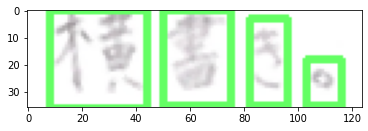


【白部分の膨張処理 - Dilation】各行の2値化処理画像 - Binarization
  画像の2値化と白部分の膨張を工夫することで、個別の文字を検出しやすいようにしています。
  画像のテキストの文字の「太さ」「行間」「文字間隔」によっては、画像のリサイズや膨張処理の微調整が必要です。
  この段階で、文字が他の文字と繋がってしまうと、個別の文字の検出ができなくなります。


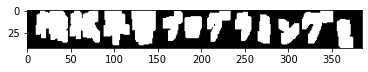


【各行の文字の輪郭検出・抽出結果 - Text recognition・Contours】
  枠が大きすぎる場合・小さすぎる場合には輪郭を除去しています。画像によって微調整する必要があります。


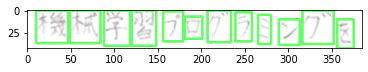


【白部分の膨張処理 - Dilation】各行の2値化処理画像 - Binarization
  画像の2値化と白部分の膨張を工夫することで、個別の文字を検出しやすいようにしています。
  画像のテキストの文字の「太さ」「行間」「文字間隔」によっては、画像のリサイズや膨張処理の微調整が必要です。
  この段階で、文字が他の文字と繋がってしまうと、個別の文字の検出ができなくなります。


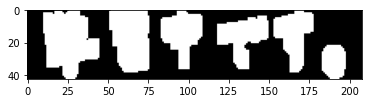


【各行の文字の輪郭検出・抽出結果 - Text recognition・Contours】
  枠が大きすぎる場合・小さすぎる場合には輪郭を除去しています。画像によって微調整する必要があります。


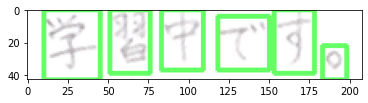


【白部分の膨張処理 - Dilation】各行の2値化処理画像 - Binarization
  画像の2値化と白部分の膨張を工夫することで、個別の文字を検出しやすいようにしています。
  画像のテキストの文字の「太さ」「行間」「文字間隔」によっては、画像のリサイズや膨張処理の微調整が必要です。
  この段階で、文字が他の文字と繋がってしまうと、個別の文字の検出ができなくなります。


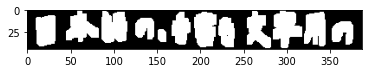


【各行の文字の輪郭検出・抽出結果 - Text recognition・Contours】
  枠が大きすぎる場合・小さすぎる場合には輪郭を除去しています。画像によって微調整する必要があります。


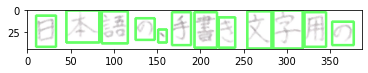


【白部分の膨張処理 - Dilation】各行の2値化処理画像 - Binarization
  画像の2値化と白部分の膨張を工夫することで、個別の文字を検出しやすいようにしています。
  画像のテキストの文字の「太さ」「行間」「文字間隔」によっては、画像のリサイズや膨張処理の微調整が必要です。
  この段階で、文字が他の文字と繋がってしまうと、個別の文字の検出ができなくなります。


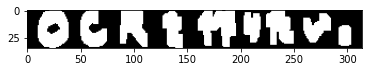


【各行の文字の輪郭検出・抽出結果 - Text recognition・Contours】
  枠が大きすぎる場合・小さすぎる場合には輪郭を除去しています。画像によって微調整する必要があります。


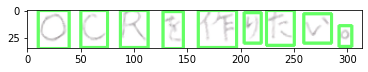



＊　上手く検出できない場合は「３．各種設定」の所で、「膨張処理の設定」「輪郭のカット設定」などを変更してみてください。
＊　直線やノイズを除去できない場合や、ノイズ除去で文字が薄くなってしまう場合は、イラスト・画像編集ソフトの使用も検討してみてください。


In [ ]:

#### １．各種インポート #### 

import os
import cv2
import numpy as np
from imutils import contours
import matplotlib.pyplot as plt
import glob
from natsort import natsorted


#### ２．文字検出する画像 #### 

input_file = 'H5_tegaki.png' # ここを変更
                             # 文字領域検出したい画像のファイル名を入力します


#### ３．各種設定 ####

# 横書き・縦書きの設定
# 横書きの文字領域検出・縦書きの文字領域検出の選択
horizontal = 0
vertical = 1
OCR_mode = 0 # ここを変更
             # 横書きは「horizontal」または「0」・縦書きは「vertical」または「1」を入力


# 膨張処理の設定
# OCRしたい画像に合わせて微調整が必要（文字の太さ・文字の線の間隔・文字の間隔などが影響します）
#【横書き】大まかな文字領域の検出（ブロック検出）のための膨張処理（カーネルサイズ・膨張処理回数）の設定
block_horizontal_kernel_hight = 5  # カーネルの縦の高さ
block_horizontal_kernel_width = 5  # カーネルの横の幅
block_horizontal_iterations = 5    # 膨張処理回数

#【縦書き】大まかな文字領域の検出（ブロック検出）のための膨張処理（カーネルサイズ・膨張処理回数）の設定
block_vertical_kernel_hight = 5  # カーネルの縦の高さ
block_vertical_kernel_width = 5  # カーネルの横の幅
block_vertical_iterations = 9    # 膨張処理回数


#【横書き】行領域の検出（行検出）のための膨張処理（カーネルサイズ・膨張処理回数）の設定
column_horizontal_kernel_hight = 2 # カーネルの縦の高さ
column_horizontal_kernel_width = 5  # カーネルの横の幅
column_horizontal_iterations = 6    # 膨張処理回数

#【縦書き】列領域の検出（列検出）のための膨張処理（カーネルサイズ・膨張処理回数）の設定
row_vertical_kernel_hight = 5  # カーネルの縦の高さ
row_vertical_kernel_width = 3  # カーネルの横の幅
row_vertical_iterations = 6    # 膨張処理回数


#【横書き】個別の文字の検出（文字検出）のための膨張処理（カーネルサイズ・膨張処理回数）の設定
character_horizontal_kernel_hight = 6  # カーネルの縦の高さ
character_horizontal_kernel_width = 3  # カーネルの横の幅
character_horizontal_iterations = 2    # 膨張処理回数

#【縦書き】個別の文字の検出（文字検出）のための膨張処理（カーネルサイズ・膨張処理回数）の設定
character_vertical_kernel_hight = 3  # カーネルの縦の高さ
character_vertical_kernel_width = 5  # カーネルの横の幅
character_vertical_iterations = 2    # 膨張処理回数


# 輪郭のカット設定
# OCRしたい画像に合わせて微調整が必要（画像の大きさが影響します）
# ブロック検出：文字領域検出した輪郭の「横幅」が、以下の範囲なら輪郭を残す
block_horizontal_height_minimum = 5  # 最小値（ピクセル）
block_horizontal_height_max = 1000   # 最大値（ピクセル）

# ブロック検出：文字領域検出した輪郭の「縦の高さ」が、以下の範囲なら輪郭を残す
block_vertical_height_minimum = 5  # 最小値（ピクセル）
block_vertical_height_max = 1000   # 最大値（ピクセル）


# 行検出：文字領域検出した輪郭の「横幅」が、以下の範囲なら輪郭を残す
row_column_horizontal_height_minimum = 5  # 最小値（ピクセル）
row_column_horizontal_height_max = 1000   # 最大値（ピクセル）

# 列検出：文字領域検出した輪郭の「縦の高さ」が、以下の範囲なら輪郭を残す
row_column_vertical_height_minimum = 5  # 最小値（ピクセル）
row_column_vertical_height_max = 1000   # 最大値（ピクセル）


# 個別の文字領域検出した輪郭の「横幅」が、以下の範囲なら輪郭を残す
character_text_detection_horizontal_height_minimum = 5  # 最小値（ピクセル）
character_text_detection_horizontal_height_max = 300    # 最大値（ピクセル）

# 個別の文字領域検出した輪郭の「縦の高さ」が、以下の範囲なら輪郭を残す
character_text_detection_vertical_height_minimum = 10  # 最小値（ピクセル）
character_text_detection_vertical_height_max = 300     # 最大値（ピクセル）






####  ４．直線の検出と除去 ####
# 元の画像から直線を検出し、直線を除去します。
# 「line_cut_元の画像のファイル名.png」を作成します

def line_cut(OCR_input_file):

  # 画像の読み込み
  img = cv2.imread(OCR_input_file)

  print('【直線を検出中・・・】直線検出する画像')
  # 画像の表示
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

  # モノクロ・グレースケール画像へ変換（2値化前の画像処理）
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # 2値化（Binarization）：白（1）黒（0）のシンプルな2値画像に変換
  retval, img_binary = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
  #plt.imshow(img_binary)
  print('【直線を検出中・・・】2値化処理画像 - Binarization')
  plt.imshow(cv2.cvtColor(img_binary, cv2.COLOR_BGR2RGB))
  plt.show()

  # 2値化画像で行う
  # rho：画素単位で計算
  # theta：ラジアン単位で計算
  # threshold：直線とみなされるのに必要な最低限の点の数を意味するしきい値。
  # 確率的ハフ変換：
  # minLineLength：検出する直線の最小の長さを表します。この値より短い線分は検出されません
  # maxLineGap：二つの点を一つの直線とみなす時に許容される最大の長さを表します
  # この値より小さい二つの点は一つの直線とみなされます
  # 必要に応じてパラメータの数値を変更してください
  lines = cv2.HoughLinesP(img_binary, rho=1, theta=np.pi/360, threshold=15, minLineLength=55, maxLineGap=5.4)

  if lines is None: # 直線が検出されない場合
    print('\n【直線の検出結果】')
    print('　直線は検出されませんでした。')
    file_name = os.path.splitext(os.path.basename(input_file))[0]
    cv2.imwrite(f'line_cut_{file_name}.png', img)
  else: # 直線が検出された場合
    print('\n【直線の検出結果】')
    print('　直線が検出されました。検出した直線を削除します。')
    for line in lines:
        x1, y1, x2, y2 = line[0]
        # 検出した直線に赤線を引く
        red_lines_img = cv2.line(img, (x1,y1), (x2,y2), (0,0,255), 3)
    print('\n【直線検出部位の視覚化】')
    print('　赤色部分が検出できた直線。')
    # 画像の表示（直線を検出した画像）
    plt.imshow(cv2.cvtColor(red_lines_img, cv2.COLOR_BGR2RGB))
    plt.show()

    for line in lines:
        x1, y1, x2, y2 = line[0]
        # 検出した直線を消す（白で線を引く）：2値化した際に黒で表示される
        no_lines_img = cv2.line(img, (x1,y1), (x2,y2), (255,255,255), 3)

        # 直線を除去した画像を元のファイル名の頭に「line_cut_」をつけて保存。「0」を指定でファイル名を取得
        file_name = os.path.splitext(os.path.basename(input_file))[0]
        cv2.imwrite(f'line_cut_{file_name}.png', no_lines_img)
    print('\n【直線検出部位の削除結果：元の画像から削除】')
    print('　白色部分が検出した直線を消した場所（背景が白の場合は区別できません）。')
    # 画像の表示（直線を削除した画像）
    plt.imshow(cv2.cvtColor(no_lines_img, cv2.COLOR_BGR2RGB))
    plt.show()

    line_cut_input_file = f'line_cut_{file_name}.png'
    img = cv2.imread(line_cut_input_file)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 2値化（Binarization）：白（1）黒（0）のシンプルな2値画像に変換
    retval, img_binary = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    print('\n【直線検出部位の削除結果：2値化処理画像 - Binarization】')
    print('　直線を除去した結果。')
    # 画像の表示（直線を削除した2値画像）
    plt.imshow(cv2.cvtColor(img_binary, cv2.COLOR_BGR2RGB))
    plt.show()



## 直線の検出と除去の関数（line_cut）の実行
line_cut(input_file)






####  ５．大まかな文字領域の検出（ブロック検出）＋ ノイズ除去 ####
# 「line_cut_元の画像のファイル名.png」（直線除去画像）からノイズを除去し、ブロック検出をおこないます
# 「block_ROI_img〜.png」（ブロック検出画像）を作成します

# 画像から文字領域を検出・抽出する処理
def block_contours (OCR_input_file):

  # 画像の読み込み
  img = cv2.imread(OCR_input_file)

  # ノイズ除去（Denoising・Noise Reduction）：メディアンフィルタの利用
  #「3」のカーネルサイズ（1・3・5・7など）を大きくすると、点々などのノイズをより消せるが、ぼやける
  # ここのノイズ除去処理により画像がぼやけるので、ここの記述「img = cv2.medianBlur(img, 3)」をなくして
  # 事前に画像処理ソフトなどでノイズを除去した方がいいのかもしれません
  img = cv2.medianBlur(img, 3)

  # モノクロ・グレースケール画像へ変換（2値化前の画像処理）
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # 2値化（Binarization）：白（1）黒（0）のシンプルな2値画像に変換
  retval, img_binary = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

  # 白部分の膨張処理（Dilation）：モルフォロジー変換 - 2値画像を対象
  if OCR_mode == 0: # 横書きの場合
    kernel = np.ones((block_horizontal_kernel_hight, block_horizontal_kernel_width),np.uint8) # カーネル（構造的要素）：全要素の値が1の縦横が任意のピクセルのカーネル
    img_dilation = cv2.dilate(img_binary,kernel,iterations = block_horizontal_iterations) #「iterations=」繰り返し膨張処理を行う回数を指定
  elif OCR_mode == 1: # 縦書きの場合
    kernel = np.ones((block_vertical_kernel_hight, block_vertical_kernel_width),np.uint8) # カーネル（構造的要素）：全要素の値が1の縦横が任意のピクセルのカーネル
    img_dilation = cv2.dilate(img_binary,kernel,iterations = block_vertical_iterations) #「iterations=」繰り返し膨張処理を行う回数を指定

  # 解説用のコメント（2値化）
  print('\n【2値化処理画像 - Binarization】')
  print('  画像の2値化と白部分の膨張を工夫することで、大まかな文字領域の検出（ブロック検出）をしています。')
  print('  この段階で、文字が「白」として処理できていないと輪郭の検出がしにくいようでした。')

  # 膨張処理後の2値化画像の表示
  plt.imshow(cv2.cvtColor(img_dilation, cv2.COLOR_BGR2RGB))
  plt.show()


  # 輪郭の検出
  #「findContours」の返り値「cnts（contours）」は輪郭毎の座標組・「hierarchy」は輪郭の階層構造
  #「cv2.RETR_EXTERNAL」：最も外側の輪郭を返す
  #「cv2.CHAIN_APPROX_SIMPLE」：輪郭上の全点の情報を保持しない。輪郭の情報を圧縮
  cnts, hierarchy = cv2.findContours(img_dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  if OCR_mode == 0: # 横書きの場合
    cnts, hierarchy = contours.sort_contours(cnts, method='top-to-bottom') # 上から下に並び替え
  elif OCR_mode == 1: # 縦書きの場合
    cnts, hierarchy = contours.sort_contours(cnts, method='right-to-left') # 右から左に並び替え

  # ROI（Region of Interest：興味領域・対象領域）抽出用の初期設定
  block_ROI_index = 0

  # 抽出した輪郭を「x, y, w（横の幅）, h（縦の高さ）」の単純なリストに変換
  result = []
  for contour in cnts:  
    x, y, w, h = cv2.boundingRect(contour) # 外接矩形の左上の位置は(x,y)，横の幅と縦の高さは(w,h)
      
    # 大きすぎる小さすぎる領域を除去。処理する画像サイズに合わせて微調整が必要
    if not block_vertical_height_minimum < w < block_vertical_height_max:
      continue
    if not block_horizontal_height_minimum < h < block_horizontal_height_max: #輪郭の描画は画像サイズを超えることもあるようでした。
      continue

    # ROI抽出：画像の切り抜きと保存 
    block_ROI = img[y:y+h, x:x+w]   
    cv2.imwrite('block_ROI_img{}.png'.format(block_ROI_index), block_ROI)
    block_ROI_index += 1
    #resultに要素を追加
    result.append([x, y, w, h])


  # 画面に矩形の輪郭を描画 （描画機能）
  for x, y, w, h in result:
      cv2.rectangle(img, (x, y), (x+w, y+h), (100, 255, 100), 3)  # 色の指定はRGB(100, 255, 100)。「3」は 太さ。数字を大きくすると太い輪郭が描画される。


  # 解説用のコメント（文字領域の輪郭検出・抽出）
  if OCR_mode == 0: # 横書きの場合
    print('\n【横書きの文字領域の輪郭検出・抽出結果 - Text detection・Contours】')
  elif OCR_mode == 1:  #縦書きの場合
    print('\n【縦書きの文字領域の輪郭検出・抽出結果 - Text detection・Contours】')
  print('  枠が大きすぎる場合・小さすぎる場合には輪郭を除去しています。画像によって微調整する必要があります。')

  # 文字領域の輪郭検出・抽出結果の表示
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()




# 元の画像ファイル名に「line_cut_」を追加
# 直線の検出と除去の関数（line_cut）を実行後に出力される画像をプログラムで使うための処理
file_name = os.path.splitext(os.path.basename(input_file))[0]
line_cut_input_file = f'line_cut_{file_name}.png'



## 大まかな文字領域の検出（ブロック検出）の関数（block_contours）の実行
block_contours (line_cut_input_file)





#### ６．角度補正 ####
# 「block_ROI_img〜.png」（ブロック検出画像）を、ブロックごとに角度補正します
# 「rotate_元の画像のファイル名.png」（角度補正した画像）を作成します

def rotate_program(OCR_input_file):

  # ブロブ処理（粒子解析・ラベリング）
  # 画像内のブロブを検出するために、グレースケールと適応しきい値に変換してバイナリ画像を取得します
  # ブロブ（塊・連結領域）とは、似た特徴を持った画像内の領域を意味
  # ブロブ検出は類似した色の連結領域（ブロブ）を識別するために画像を分析
  # ブロブ解析（中心座標やサイズなど取得）
  # 画像をラベリング処理し、ラベル付けされた領域の特徴を解析することをブロブ解析
  block_img = cv2.imread(OCR_input_file)
  print('【元の画像】')
  plt.imshow(cv2.cvtColor(block_img, cv2.COLOR_BGR2RGB))
  plt.show()

  # モノクロ・グレースケール画像へ変換（2値化前の画像処理）
  block_img_gray = cv2.cvtColor(block_img, cv2.COLOR_BGR2GRAY)

  # 2値化（Binarization）：白（1）黒（0）のシンプルな2値画像に変換
  retval, block_img_binary = cv2.threshold(block_img_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

  print('【2値化画像】')
  plt.imshow(cv2.cvtColor(block_img_binary, cv2.COLOR_BGR2RGB))
  plt.show()

  # 輪郭を見つける
  cnts, hierarchy = cv2.findContours(block_img_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
  # 輪郭の選択
  # 面積が小さい輪郭削除 「5」のところの数値より小さい輪郭は削除
  cnts = list(filter(lambda cnts: 5 < cv2.contourArea(cnts), cnts))


  # 入力画像のMat（画像用の行列）のコピー
  block_blob_cnts = np.copy(block_img)

  # 輪郭を描画した配列を作成
  cv2.drawContours(block_blob_cnts, cnts, -1, (255,0,0))

  # 外接矩形
  # 入力画像のMat（画像用の行列）のコピー
  block_bounding_img = np.copy(block_img)

  # 画面に矩形の輪郭を描画 
  for contour in cnts:
      x, y, w, h = cv2.boundingRect(contour)
      cv2.rectangle(block_bounding_img, (x, y), (x + w, y + h), (0, 255, 0), 1)

  print('【輪郭を描画した画像】')
  # 輪郭の個数を出力
  print('　ブロブの数: %d' % len(cnts))
  plt.imshow(cv2.cvtColor(block_bounding_img, cv2.COLOR_BGR2RGB))
  plt.show()

  # ブロブの角度からcv2.minAreaRect()で、スキュー角度（傾斜：skew angle）を計算
  # スキュー角度：水平および垂直の配置に画像イメージを返すのに必要な回転の量
  # np.where(block_img_binary > 0)：0より大きい全てのピクセル値の座標を取得
  # np.column_stack：配列を列方向に積み重ねる
  coordinates= np.column_stack(np.where(block_img_binary > 0))

  # 全ての座標の最小回転境界ボックスを計算
  # 長方形が、xy軸と平行な状態の時に「-90」を返す。時計回りに回転させていくと「0」にむかって値が増えていく
  # 長方形は、90度回転すると、xy軸と平行な状態になるため、「-90」に戻る
  angle = cv2.minAreaRect(coordinates)[-1]
  if angle < -45:
      angle = -(90 + angle)
  else:
      angle = -angle

  # アフィン変換を適用してスキュー角度（傾斜：skew angle）を修正
  # 水平になるように回転
  (h, w) = block_img.shape[:2]
  center = (w // 2, h // 2)
  # 回転のための変換行列の生成 
  # cv2.getRotationMatrix2D（入力画像の回転中心, 回転角度 単位は度- 正の値：反時計回り, 等方性スケーリング係数 - 拡大縮小の倍率）
  rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

  # v2.warpAffine（元の画像, cv2.getRotationMatrix2Dで生成した2*3の変換行列, 出力する画像サイズ(縦の高さ, 横の幅)）
  block_rotate_img = cv2.warpAffine(block_img, rotation_matrix, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

  #  元の画像を傾き角度補正（回転）した画像を表示
  print('【角度補正した画像】')
  print('　補正角度：', angle, '度')
  plt.imshow(cv2.cvtColor(block_rotate_img, cv2.COLOR_BGR2RGB))
  plt.show()

  # 角度補正した画像を「rotate_元の画像のファイル名.png」で保存。「0」を指定でファイル名を取得
  file_name = os.path.splitext(os.path.basename(OCR_input_file))[0]
  cv2.imwrite(f'rotate_{file_name}.png', block_rotate_img)




## 角度補正のための関数（rotate_program）の実行


#「block_ROI_img〜.png」（大まかな文字領域の検出：ブロック検出画像）という名前のファイルの取得
file_list = glob.glob('block_ROI_img*png')

#「block_ROI_img〜.png」（〜の部分に0や1などの数字が入る）という名前のファイルを0から順番に並び替え
print(natsorted(file_list))

#「block_ROI_img〜.png」のファイルを順番に角度補正のための関数（rotate_program）に入れる
for file in natsorted(file_list):
  rotate_program(file)








#### ７．横書き・縦書きの行・列領域の検出（行と列の検出） #### 
# 「rotate_元の画像のファイル名.png」（角度補正した画像）から行と列の検出をします
# 「row_column_ROI_img〜.png」（行や列を検出した画像）を作成します

def text_row_column_detection (OCR_input_file):
  # 画像の読み込み
  row_column_img = cv2.imread(OCR_input_file)
  
  # モノクロ・グレースケール画像へ変換（2値化前の画像処理）
  row_column_img_gray = cv2.cvtColor(row_column_img, cv2.COLOR_BGR2GRAY)

  # 2値化（Binarization）：白（1）黒（0）のシンプルな2値画像に変換
  retval, row_column_img_binary = cv2.threshold(row_column_img_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

  # 白部分の膨張処理（Dilation）：モルフォロジー変換 - 2値画像を対象
  if OCR_mode == 0: # 横書きの場合
    kernel = np.ones((column_horizontal_kernel_hight, column_horizontal_kernel_width),np.uint8) # カーネル（構造的要素）：全要素の値が1の縦横が任意のピクセルのカーネル
    row_column_img_dilation = cv2.dilate(row_column_img_binary,kernel,iterations = column_horizontal_iterations) #「iterations=」繰り返し膨張処理を行う回数を指定  
    print('\n【各行の2値化処理画像 - Binarization】') 
  elif OCR_mode == 1:  #縦書きの場合
    kernel = np.ones((row_vertical_kernel_hight, row_vertical_kernel_width),np.uint8) # カーネル（構造的要素）：全要素の値が1の縦横が任意のピクセルのカーネル
    row_column_img_dilation = cv2.dilate(row_column_img_binary,kernel,iterations = row_vertical_iterations) #「iterations=」繰り返し膨張処理を行う回数を指定  
    print('\n【各列の2値化処理画像 - Binarization】')
  print('  画像の2値化と白部分の膨張を工夫することで、文字と文字の繋がりを検出しています。')
  print('  画像のテキストの文字の「太さ」「行間」「文字間隔」によっては、画像のリサイズの微調整や膨張処理の微調整が必要です。')


  # 膨張処理後の2値化画像の表示
  plt.imshow(cv2.cvtColor(row_column_img_dilation, cv2.COLOR_BGR2RGB))
  plt.show()

  # 輪郭の検出
  #「findContours」の返り値「contours」は輪郭毎の座標組・「hierarchy」は輪郭の階層構造
  #「cv2.RETR_EXTERNAL」：最も外側の輪郭を返す
  #「cv2.CHAIN_APPROX_SIMPLE」：輪郭上の全点の情報を保持しない。輪郭の情報を圧縮
  cnts, hierarchy = cv2.findContours(row_column_img_dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  if OCR_mode == 0: # 横書きの場合
      cnts, hierarchy = contours.sort_contours(cnts, method='top-to-bottom') # 上から下に並び替え
  elif OCR_mode == 1: # 縦書きの場合
      cnts, hierarchy = contours.sort_contours(cnts, method='right-to-left') # 右から左に並び替え

  # 抽出した輪郭を「x, y, w（横の幅）, h（縦の高さ）」の単純なリストに変換
  for row_column_contour in cnts:  
    x, y, w, h = cv2.boundingRect(row_column_contour) # 外接矩形の左上の位置は(x,y)，横の幅と縦の高さは(w,h)
    
    # 大きすぎる小さすぎる領域を除去。処理する画像サイズに合わせて微調整が必要
    if not row_column_vertical_height_minimum < w < row_column_vertical_height_max:
      continue
    if not row_column_horizontal_height_minimum < h < row_column_horizontal_height_max: #輪郭の描画は画像サイズを超えることもあるようでした。
      continue

  # 抽出した輪郭を「x, y, w（横の幅）, h（縦の高さ）」の単純なリストに変換
  row_column_result = []
  for row_column_contour in cnts:  
    x, y, w, h = cv2.boundingRect(row_column_contour) # 外接矩形の左上の位置は(x,y)，横の幅と縦の高さは(w,h)
    
    # 大きすぎる小さすぎる領域を除去。処理する画像サイズに合わせて微調整が必要
    if not row_column_vertical_height_minimum < w < row_column_vertical_height_max:
      continue
    if not row_column_horizontal_height_minimum < h < row_column_horizontal_height_max: #輪郭の描画は画像サイズを超えることもあるようでした。
      continue

    #resultに要素を追加
    row_column_result.append([x, y, w, h])

  # 画面に矩形の輪郭を描画 （描画機能：for〜cv2.rectangleまでの2行をコメントアウト、または削除すると輪郭の描画を無効にできます）
  for x, y, w, h in row_column_result:
      cv2.rectangle(row_column_img, (x, y), (x+w, y+h), (100, 255, 100), 2)  # 色の指定はRGB(100, 255, 100)。「2」は 太さ。数字を大きくすると太い輪郭が描画される。


  # 解説用のコメント（輪郭検出・抽出）
  if OCR_mode == 0: # 横書きの場合
    print('\n【各行の文字の輪郭検出・抽出結果 - Text recognition・Contours】')
  elif OCR_mode == 1:  #縦書きの場合
    print('\n【各列の文字の輪郭検出・抽出結果 - Text recognition・Contours】')
  print('  枠が大きすぎる場合・小さすぎる場合には輪郭を除去しています。画像によって微調整する必要があります。')

  # 輪郭検出・抽出結果の表示
  plt.imshow(cv2.cvtColor(row_column_img, cv2.COLOR_BGR2RGB))
  plt.show()




##「row_column_ROI_img〜.png」（行や列を検出した画像）の画像を保存するための処理


#「rotate_block_ROI_img〜.png」（角度補正後のブロック検出画像）という名前のファイルの取得
file_list = glob.glob('rotate_block_ROI_img*png')

#「rotate_block_ROI_img〜.png」（〜の部分に0や1などの数字が入る）という名前のファイルを0から順番に並び替え
print(natsorted(file_list))

# ROI（Region of Interest：興味領域・対象領域）抽出用の初期設定
row_column_ROI_index = 0

#「rotate_block_ROI_img〜.png」のファイルを順番に処理する
for file in natsorted(file_list):
  row_column_img = cv2.imread(file)

  # モノクロ・グレースケール画像へ変換（2値化前の画像処理）
  row_column_img_gray = cv2.cvtColor(row_column_img, cv2.COLOR_BGR2GRAY)

  # 2値化（Binarization）：白（1）黒（0）のシンプルな2値画像に変換
  retval, row_column_img_binary = cv2.threshold(row_column_img_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

  if OCR_mode == 0: # 横書きの場合
    kernel = np.ones((column_horizontal_kernel_hight, column_horizontal_kernel_width),np.uint8) # カーネル（構造的要素）：全要素の値が1の縦横が任意のピクセルのカーネル
    row_column_img_dilation = cv2.dilate(row_column_img_binary,kernel,iterations = column_horizontal_iterations) #「iterations=」繰り返し膨張処理を行う回数を指定  
    print('\n【各行の2値化処理画像 - Binarization】') 
  elif OCR_mode == 1:  #縦書きの場合
    kernel = np.ones((row_vertical_kernel_hight, row_vertical_kernel_width),np.uint8) # カーネル（構造的要素）：全要素の値が1の縦横が任意のピクセルのカーネル
    row_column_img_dilation = cv2.dilate(row_column_img_binary,kernel,iterations = row_vertical_iterations) #「iterations=」繰り返し膨張処理を行う回数を指定  

  cnts, hierarchy = cv2.findContours(row_column_img_dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  if OCR_mode == 0: # 横書きの場合
      cnts, hierarchy = contours.sort_contours(cnts, method='top-to-bottom') # 上から下に並び替え
  elif OCR_mode == 1: # 縦書きの場合
      cnts, hierarchy = contours.sort_contours(cnts, method='right-to-left') # 右から左に並び替え

  # 抽出した輪郭を「x, y, w（横の幅）, h（縦の高さ）」の単純なリストに変換
  for row_column_contour in cnts:  
    x, y, w, h = cv2.boundingRect(row_column_contour) # 外接矩形の左上の位置は(x,y)，横の幅と縦の高さは(w,h)

    # ROI抽出：画像の切り抜きと保存。 
    row_column_ROI = row_column_img[y:y+h, x:x+w]   
    cv2.imwrite('row_column_ROI_img{}.png'.format(row_column_ROI_index), row_column_ROI)

    row_column_ROI_index += 1






#### ７．個別の文字の検出（文字検出）＋ 個別の文字検出枠の描画設定 #### 
# 「row_column_ROI_img〜.png」（行や列を検出した画像）から、行や列ごとに個別の文字を検出します
# 「OCR_img〜.png」（個別文字検出画像）を作成します
# 「個別の文字検出枠の描画設定：画面に矩形の輪郭を描画」のコードをコメントアウトまたは削除すると個別の文字検出枠を無効化できます
# 個別の文字検出枠の有無や太さによってOCR結果の精度に影響がでます。基本的に枠線が無い方が精度は良いです
# 個別の文字検出枠があると、どの程度文字検出ができているか把握しやすいので、お好みに応じて調整してみてください

def find_draw_contours (OCR_input_file):
  # 画像の読み込み
  predict_img = cv2.imread(OCR_input_file)
  
  # モノクロ・グレースケール画像へ変換（2値化前の画像処理）
  predict_img_gray = cv2.cvtColor(predict_img, cv2.COLOR_BGR2GRAY)

  # 2値化（Binarization）：白（1）黒（0）のシンプルな2値画像に変換
  retval, predict_img_binary = cv2.threshold(predict_img_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

  # 白部分の膨張処理（Dilation）：モルフォロジー変換 - 2値画像を対象
  if OCR_mode == 0: # 横書きの場合
    kernel = np.ones((character_horizontal_kernel_hight, character_horizontal_kernel_width),np.uint8) # カーネル（構造的要素）：全要素の値が1の縦横が任意のピクセルのカーネル
    predict_img_dilation = cv2.dilate(predict_img_binary,kernel,iterations = character_horizontal_iterations) #「iterations=」繰り返し膨張処理を行う回数を指定
  elif OCR_mode == 1: #縦書きの場合
    kernel = np.ones((character_vertical_kernel_hight, character_vertical_kernel_width),np.uint8) # カーネル（構造的要素）：全要素の値が1の縦横が任意のピクセルのカーネル
    predict_img_dilation = cv2.dilate(predict_img_binary,kernel,iterations = character_vertical_iterations) #「iterations=」繰り返し膨張処理を行う回数を指定

  # 解説用のコメント（2値化）
  if OCR_mode == 0: # 横書きの場合
    print('\n【白部分の膨張処理 - Dilation】各行の2値化処理画像 - Binarization')
  elif OCR_mode == 1:  #縦書きの場合
    print('\n【白部分の膨張処理 - Dilation】各列の2値化処理画像 - Binarization')
  print('  画像の2値化と白部分の膨張を工夫することで、個別の文字を検出しやすいようにしています。')
  print('  画像のテキストの文字の「太さ」「行間」「文字間隔」によっては、画像のリサイズや膨張処理の微調整が必要です。')
  print('  この段階で、文字が他の文字と繋がってしまうと、個別の文字の検出ができなくなります。')

  # 膨張処理後の2値化画像の表示
  plt.imshow(cv2.cvtColor(predict_img_dilation, cv2.COLOR_BGR2RGB))
  plt.show()



  # 輪郭の検出
  #「findContours」の返り値「contours」は輪郭毎の座標組・「hierarchy」は輪郭の階層構造
  #「cv2.RETR_EXTERNAL」：最も外側の輪郭を返す
  #「cv2.CHAIN_APPROX_SIMPLE」：輪郭上の全点の情報を保持しない。輪郭の情報を圧縮
  cnts, hierarchy = cv2.findContours(predict_img_dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  if OCR_mode == 0: # 横書きの場合
      cnts, hierarchy = contours.sort_contours(cnts, method='left-to-right') # 左から右に並び替え
  elif OCR_mode == 1: # 縦書きの場合
      cnts, hierarchy = contours.sort_contours(cnts, method='top-to-bottom') # 上から下に並び替え

  # 画像の上に数字の結果を出すためにここでもROI設定は必要
  # ROI（Region of Interest：興味領域・対象領域）抽出用の初期設定
  OCR_index = 0

  # 抽出した輪郭を「x, y, w（横の幅）, h（縦の高さ）」の単純なリストに変換
  predict_result = []
  for predict_contour in cnts:  
    x, y, w, h = cv2.boundingRect(predict_contour) # 外接矩形の左上の位置は(x,y)，横の幅と縦の高さは(w,h)
    
    # 大きすぎる小さすぎる領域を除去。処理する画像サイズに合わせて微調整が必要
    if not character_text_detection_horizontal_height_minimum < w < character_text_detection_horizontal_height_max:
      continue
    if not character_text_detection_vertical_height_minimum < h < character_text_detection_vertical_height_max: #輪郭の描画は画像サイズを超えることもあるようでした。
      continue

    # ROI抽出：画像の切り抜きと保存。→　再学習用に別プログラムを作成する OCR_index自体は、文字数判断のために必要かもしれない
    predict_ROI = predict_img[y:y+h, x:x+w]   
    OCR_index += 1

    #resultに要素を追加
    predict_result.append([x, y, w, h])

  ## 個別の文字検出枠の描画設定：画面に矩形の輪郭を描画 
  # 描画機能：for〜cv2.rectangleまでの2行をコメントアウト、または削除すると輪郭の描画を無効にできます
  # 行・列ごとのOCR結果の表示の際に影響します（線ありの場合、精度が下がります）。「OCR結果：全文」には影響しません
  for x, y, w, h in predict_result:
     cv2.rectangle(predict_img, (x, y), (x+w, y+h), (100, 255, 100), 2)  # 色の指定はRGB(100, 255, 100)。「2」は 太さ。数字を大きくすると太い輪郭が描画される。

  # 解説用のコメント（輪郭検出・抽出）
  if OCR_mode == 0: # 横書きの場合
    print('\n【各行の文字の輪郭検出・抽出結果 - Text recognition・Contours】')
  elif OCR_mode == 1:  #縦書きの場合
    print('\n【各列の文字の輪郭検出・抽出結果 - Text recognition・Contours】')
  print('  枠が大きすぎる場合・小さすぎる場合には輪郭を除去しています。画像によって微調整する必要があります。')

  # 輪郭検出・抽出結果の表示
  plt.imshow(cv2.cvtColor(predict_img, cv2.COLOR_BGR2RGB))
  plt.show()

  return predict_result, predict_img, OCR_index




##「OCR_img〜.png」（個別文字検出）の画像を保存するための処理


#「row_column_ROI_img〜.png」（行や列を検出した画像）という名前のファイルの取得
file_list = glob.glob('row_column_ROI_img*png')

#「row_column_ROI_img〜.png」（〜の部分に0や1などの数字が入る）という名前のファイルを0から順番に並び替え
print(natsorted(file_list))

# ROI（Region of Interest：興味領域・対象領域）抽出用の初期設定
OCR_index = 0

#「row_column_ROI_img〜.png」のファイルを順番に処理する
for file in natsorted(file_list):
  predict_img = cv2.imread(file)

  # モノクロ・グレースケール画像へ変換（2値化前の画像処理）
  predict_img_gray = cv2.cvtColor(predict_img, cv2.COLOR_BGR2GRAY)

  # 2値化（Binarization）：白（1）黒（0）のシンプルな2値画像に変換
  retval, predict_img_binary = cv2.threshold(predict_img_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

  # 白部分の膨張処理（Dilation）：モルフォロジー変換 - 2値画像を対象
  if OCR_mode == 0: # 横書きの場合
    kernel = np.ones((character_horizontal_kernel_hight, character_horizontal_kernel_width),np.uint8) # カーネル（構造的要素）：全要素の値が1の縦横が任意のピクセルのカーネル
    predict_img_dilation = cv2.dilate(predict_img_binary,kernel,iterations = character_horizontal_iterations) #「iterations=」繰り返し膨張処理を行う回数を指定
  elif OCR_mode == 1: #縦書きの場合
    kernel = np.ones((character_vertical_kernel_hight, character_vertical_kernel_width),np.uint8) # カーネル（構造的要素）：全要素の値が1の縦横が任意のピクセルのカーネル
    predict_img_dilation = cv2.dilate(predict_img_binary,kernel,iterations = character_vertical_iterations) #「iterations=」繰り返し膨張処理を行う回数を指定

  cnts, hierarchy = cv2.findContours(predict_img_dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  if OCR_mode == 0: # 横書きの場合
      cnts, hierarchy = contours.sort_contours(cnts, method='left-to-right') # 左から右に並び替え
  elif OCR_mode == 1: # 縦書きの場合
      cnts, hierarchy = contours.sort_contours(cnts, method='top-to-bottom') # 上から下に並び替え

  # 抽出した輪郭を「x, y, w（横の幅）, h（縦の高さ）」の単純なリストに変換
  predict_result = []
  for predict_contour in cnts:  
    x, y, w, h = cv2.boundingRect(predict_contour) # 外接矩形の左上の位置は(x,y)，横の幅と縦の高さは(w,h)
    
    # 大きすぎる小さすぎる領域を除去。処理する画像サイズに合わせて微調整が必要
    if not character_text_detection_horizontal_height_minimum < w < character_text_detection_horizontal_height_max:
      continue
    if not character_text_detection_vertical_height_minimum < h < character_text_detection_vertical_height_max: #輪郭の描画は画像サイズを超えることもあるようでした。
      continue

    # ROI抽出：画像の切り抜きと保存。→　再学習用に別プログラムを作成する OCR_index自体は、文字数判断のために必要かもしれない。
    predict_ROI = predict_img[y:y+h, x:x+w]   
    cv2.imwrite('OCR_img{}.png'.format(OCR_index), predict_ROI)
    OCR_index += 1





#### ８．関数の実行等 #### 
 

# 横書き・縦書きの行・列領域の検出（行と列の検出）する関数（text_row_column_detection）の実行
#「block_ROI_img〜.png」という名前のファイルの取得
file_list = glob.glob('rotate_block_ROI_img*png')

#「block_ROI_img〜.png」（〜の部分に0や1などの数字が入る）という名前のファイルを0から順番に並び替え
print(natsorted(file_list))

#「block_ROI_img〜.png」のファイルを順番に、
# 横書き・縦書きの行・列領域の検出（行と列の検出）する関数（text_row_column_detection）に入れる
for file in natsorted(file_list):
  text_row_column_detection(file) 


# 個別の文字の検出（文字検出）する関数（find_draw_contours）の実行
#「row_column_ROI_img〜.png」という名前のファイルの取得
file_list = glob.glob('row_column_ROI_img*png')

#「row_column_ROI_img〜.png」（〜の部分に0や1などの数字が入る）という名前のファイルを0から順番に並び替え
print(natsorted(file_list))

#「row_column_ROI_img〜.png」のファイルを順番に、
# 個別の文字の検出（文字検出）する関数（find_draw_contours）に入れる
for file in natsorted(file_list):
  find_draw_contours(file) 



print('\n\n＊　上手く検出できない場合は「３．各種設定」の所で、「膨張処理の設定」「輪郭のカット設定」などを変更してみてください。')
print('＊　直線やノイズを除去できない場合や、ノイズ除去で文字が薄くなってしまう場合は、イラスト・画像編集ソフトの使用も検討してみてください。')




#### ９．出力した画像ファイルの削除 #### 
# 今回のコードでは、画像を一度作成後に、プログラム内で利用し、最後に作成した画像を削除しています
# そのため、次に文字検出を実行する画像内の文字検出数などが少ないと、誤作動が起きるリスクがあります
# 画像ファイルを保存した場合には、一度生成された画像を削除してから、新たな画像の文字検出を試みてください
# 「個別の文字領域検出した画像（OCR_img*png）の削除」のコードをコメントアウトまたは、削除すると個別の文字検出画像を保存できます

# 直線検出した画像（line_cut_元のファイル名.png）の削除：
# 保存したい場合は、ここをコメントアウト（または削除）すると画像を保存できます
file_name = os.path.splitext(os.path.basename(input_file))[0]
os.remove(f'line_cut_{file_name}.png')


# 大まかな文字領域の検出（ブロック検出）した画像（「block_ROI_img〜.png」）の削除：
# 保存したい場合は、ここをコメントアウト（または削除）すると画像を保存できます
file_list = glob.glob("block_ROI_img*png")
for file in natsorted(file_list):
  os.remove(file)


# 角度補正した画像（「rotate_block_ROI_img〜.png」）の削除：
# 保存したい場合は、ここをコメントアウト（または削除）すると画像を保存できます
file_list = glob.glob('rotate_block_ROI_img*png')
for file in file_list:
  os.remove(file)


# 横書き・縦書きの行・列領域の検出（行と列の検出）した画像（「row_column_ROI_img〜.png」）の削除：
# 保存したい場合は、ここをコメントアウト（または削除）すると画像を保存できます
file_list = glob.glob("row_column_ROI_img*png")
for file in natsorted(file_list):
  os.remove(file)


# 個別の文字の検出（文字検出）画像（「OCR_img〜.png」）の削除：
# 保存したい場合は、ここをコメントアウト（または削除）すると画像を保存できます（今回は一部の画像のみ。ステップ4のプログラムでは全てに対応。）
file_list = glob.glob('OCR_img*png')
for file in natsorted(file_list):
  os.remove(file)







<br><br>
<b>⑤ 出力された画像のリセット用プログラム</b><br>
上記のコードの「９．出力した画像ファイルの削除のためのプログラム」の機能をOFFにした場合等に活用できます。

In [ ]:
import glob
import os
 

# 直線検出した画像（「line_cut_元のファイル名.png」）の削除
#（直線検出した画像を保存した場合に、ここのプログラムをコメントアウトして使います。画像がない場合はエラーになります）
# file_name = os.path.splitext(os.path.basename(input_file))[0]
# os.remove(f'line_cut_{file_name}.png')


# 大まかな文字領域の検出（ブロック検出）した画像（「block_ROI_img〜.png」）の削除
file_list = glob.glob("block_ROI_img*png")
for file in file_list:
  os.remove(file)


# 角度補正した画像（「rotate_block_ROI_img〜.png」）の削除
file_list = glob.glob('rotate_block_ROI_img*png')
for file in file_list:
  os.remove(file)


# 横書き・縦書きの行・列領域の検出（行と列の検出）した画像（「row_column_ROI_img〜.png」）の削除
file_list = glob.glob('row_column_ROI_img*png')
for file in file_list:
  os.remove(file)


# 個別の文字の検出（文字検出）画像（「OCR_img〜.png」）の削除
file_list = glob.glob('OCR_img*png')
for file in file_list:
  os.remove(file)

In [ ]:
print('【ローカル環境で再現したい方用の情報】')
print('上記の日本語の文字検出 & 角度補正のためのプログラムのライブラリなどのバージョン')
print('（実行時点のバージョンです）')

import platform
print('python ' + platform.python_version())

import imutils
print('imutils ' + imutils.__version__)

import natsort
print('natsort ' + natsort.__version__)

import cv2
print('opencv（opencv-python）' +  cv2.__version__)

import matplotlib
print('matplotlib ' + matplotlib.__version__)

【ローカル環境で再現したい方用の情報】
上記の日本語の文字検出 & 角度補正のためのプログラムのライブラリなどのバージョン
（実行時点のバージョンです）
python 3.7.12
imutils 0.5.4
natsort 5.5.0
opencv（opencv-python）4.1.2
matplotlib 3.2.2


<br><br>
**【次のステップ】**
<br><br>
続いて、日本語の手書き文字のOCRに挑戦
<br><br>
<b>【ステップ４】</b><br>
日本語手書きOCR：横書き・縦書き文字認識 ＋再学習
<br>
[Japanese-handwritten-text-original-OCR-Basic.ipynb | Google Colaboratory 共有ファイル](https://colab.research.google.com/drive/1VJFrOV__DnCRgRK4NBP8lwqVu2NK8pT7?usp=sharing)
<br><br>

<br><br>
<b>【初版公開】</b>2021年9月25日
<br>
<b>【最終更新】</b>2021年10月1日<br>
<br>
記事ページ：<br>
【ステップ３-４：傾いた画像の日本語検出】<br>
[傾き・角度補正の機能を実装：横書き・縦書き文章の日本語検出（ブロック→行と列→個別文字）by 子供プログラマー](https://child-programmer.com/japanese-handwritten-text-detection-rotation-correction/)
<br><br>

【日本語手書きOCR編】連続文字画像認識プログラミング入門（一覧）<br>
[【日本語手書きOCR編】連続文字画像認識プログラミング入門（Python・OpenCV・Keras・CNN）by 子供プログラマー](https://child-programmer.com/japanese-handwritten-text-ocr-beginner/)
<br><br>

[日本人のための人工知能プログラマー入門講座（機械学習）by 子供プログラマー](https://child-programmer.com/ai/)